# Next Word Prediction Model

In [ ]:
# Import modules

from numpy import array
from keras.callbacks import CSVLogger
import numpy as np
from pickle import dump
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Embedding
import io

In [ ]:
# Create a function to read the data from a fuile

def load_doc(filename):
    with io.open(filename, 'r', encoding='utf8') as f:
        text = f.read()
    return text

In [ ]:
file_path = "/content/data5.txt"
doc = load_doc(file_path)
lines = doc.split('\n')

In [40]:
import wordcloud

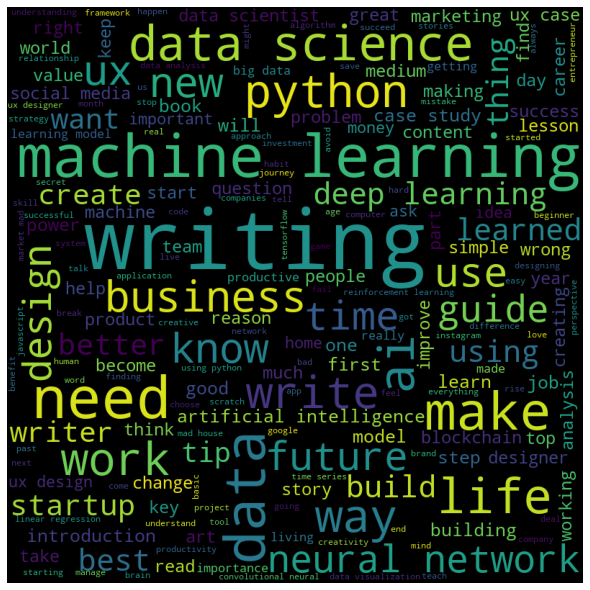

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
 
comment_words = ''
stopwords = set(STOPWORDS)
 

for val in lines:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# Encode text as integers

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

In [ ]:
# Convert text to sequence

sequences = tokenizer.texts_to_sequences(lines)

In [ ]:
# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

7761

In [ ]:
length = 6

In [ ]:
# Convert sequence to array

sequences = array(sequences)
sequences

array([[   3,   58,    2,  433, 1730,   11],
       [  58,    2,  433, 1730,   11, 2310],
       [   2,  433, 1730,   11, 2310,   86],
       ...,
       [ 643,    5,    2,   55,    3,   74],
       [   5,    2,   55,    3,   74,   47],
       [   2,   55,    3,   74,   47,  673]])

In [ ]:
# Split data into train set (X) and labels (y)

sequences = array(sequences)

X, y = sequences[:,:-1], sequences[:,-1]

y = to_categorical(y, num_classes=vocab_size)

In [ ]:
# Obtain sequence length

seq_length = X.shape[1]

In [44]:
# Model definition

model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model fitting

csv_logger = CSVLogger('training_1_1.log')
history = model.fit(X, y, batch_size=500, epochs=1000, callbacks=[csv_logger])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 50)             388050    
                                                                 
 gru_2 (GRU)                 (None, 1, 100)            45600     
                                                                 
 gru_3 (GRU)                 (None, 100)               60600     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 7761)              783861    
                                                                 
Total params: 1,288,211
Trainable params: 1,288,211
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000


98/98 [==============================] - 29s 184ms/step - loss: 7.6230 - accuracy: 0.0371
Epoch 2/1000
98/98 [==============================] - 5s 52ms/step - loss: 7.0212 - accuracy: 0.0373
Epoch 3/1000
98/98 [==============================] - 3s 29ms/step - loss: 6.9879 - accuracy: 0.0373
Epoch 4/1000
98/98 [==============================] - 4s 38ms/step - loss: 6.9691 - accuracy: 0.0380
Epoch 5/1000
98/98 [==============================] - 2s 22ms/step - loss: 6.9538 - accuracy: 0.0393
Epoch 6/1000
98/98 [==============================] - 2s 24ms/step - loss: 6.9039 - accuracy: 0.0414
Epoch 7/1000
98/98 [==============================] - 2s 22ms/step - loss: 6.7793 - accuracy: 0.0550
Epoch 8/1000
98/98 [==============================] - 2s 24ms/step - loss: 6.6126 - accuracy: 0.0621
Epoch 9/1000
98/98 [==============================] - 2s 23ms/step - loss: 6.4629 - accuracy: 0.0709
Epoch 10/1000
98/98 [==============================] - 2s 23ms/step - loss: 6.3180 - accuracy: 0.0755


In [50]:
def plot_loss_curves(history, loss_or_acc='loss'):
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    
    epochs = range(len(history.history['loss']))
    
    if loss_or_acc=='loss':
      plt.plot(epochs, loss, label="training loss")
      plt.title("loss")
      plt.xlabel("Epochs")
      plt.legend()
      plt.show()
    else:
      plt.plot(epochs, accuracy, label="training accuracy")
      plt.title("Accuracy")
      plt.xlabel("Epochs")
      plt.legend()
      plt.show()

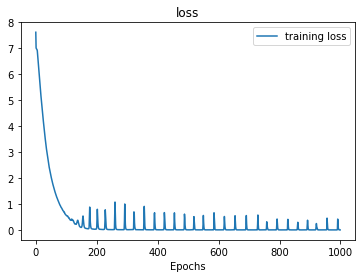

In [51]:
plot_loss_curves(history)

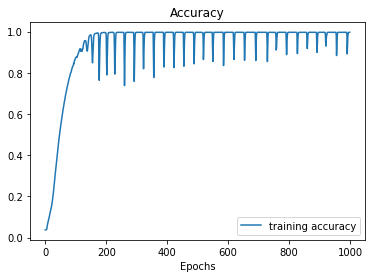

In [52]:
plot_loss_curves(history, 'acc')

In [ ]:
# Save model file and tokenizer file for word prediction

model.save('model.h5')
dump(tokenizer, open(r'tokenizer.pkl', 'wb'))

In [ ]:
# Import modules for load model and tokenizer files

from pickle import load
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
model_1 = load_model(r'/content/model.h5')
tokenizer_1 = load(open(r'/content/tokenizer.pkl', 'rb'))

In [ ]:
seed_text = 'data'
res = len(seed_text.split())
if(res>5):
    res=3
    seed_text = seed_text.split()
    lent = len(seed_text)
    lent = lent-3
    seed_text = seed_text[lent:]
    seed_text = ' '.join(map(str, seed_text))


seq_length = res



if(res==1):
    model=model_1
    tokenizer = tokenizer_1
elif(res==2):
    #For 2nd prediction
    model_new = model_1
    tokenizer_new = tokenizer_1
    #For 1st prediction
    model=model_2
    tokenizer = tokenizer_2
     

In [ ]:
final = input("Enter your text :")

Enter your text :Ife is a data


In [ ]:
next_words = 4

In [ ]:
res = len(seed_text.split())
seq_length = res


if(res==1):
    model=model_1
    tokenizer = tokenizer_1
elif(res==2):
    #For 2nd prediction
    model_new = model_1
    tokenizer_new = tokenizer_1
    #For 1st prediction
    model=model_1
    tokenizer = tokenizer_1

In [ ]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([final])[0]
    token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
    predicted=model.predict(token_list) 
    predicted=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    final += " " + output_word
print(final)

1/1 [==============================] - 0s 22ms/step
Ife is a data recognition we spot predicting


In [ ]:
def predict_n_words(num_words, text):
  """
  num_words --> Integer
    specifies the number of words to be predicted

  text --> string
    base word on which the prediction is performed
  """

  for _ in range(num_words):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
    predicted=model.predict(token_list) 
    predicted=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    text += " " + output_word
  return text

In [ ]:
predict_n_words(1, 'Data science is')

1/1 [==============================] - 0s 42ms/step


'Data science is negative'

In [ ]:
predict_n_words(10, "Chat GPT")

1/1 [==============================] - 0s 21ms/step


'Chat GPT with question should be humans technology to meaning we spot'